<a href="https://colab.research.google.com/github/suk404/Sukriti-Khanal/blob/main/Melbourne_House_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
path="/content/Melbourne_housing_FULL.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df.drop(columns=['Lattitude', 'Longtitude', 'Address', 'Date'], inplace=True)

In [ ]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df.Price = df.Price.fillna(df.Price.mean())

In [ ]:
print (df[df.Distance.isna()].index)
print (df[df.Postcode.isna()].index)

Int64Index([29483], dtype='int64')
Int64Index([29483], dtype='int64')


In [ ]:
df.dropna(subset=['Distance','Postcode'], inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.0,2.0,3.000000e+00,4.0,16.0
Price,34856.0,1.050186e+06,567139.098595,85000.0,695000.0,1.050173e+06,1150000.0,11200000.0
Distance,34856.0,1.118493e+01,6.788892,0.0,6.4,1.030000e+01,14.0,48.1
Postcode,34856.0,3.116063e+03,109.023903,3000.0,3051.0,3.103000e+03,3156.0,3978.0
Bedroom2,26640.0,3.084647e+00,0.980690,0.0,2.0,3.000000e+00,4.0,30.0
Bathroom,26631.0,1.624798e+00,0.724212,0.0,1.0,2.000000e+00,2.0,12.0
Car,26129.0,1.728845e+00,1.010771,0.0,1.0,2.000000e+00,2.0,26.0
Landsize,23047.0,5.935990e+02,3398.841946,0.0,224.0,5.210000e+02,670.0,433014.0
BuildingArea,13742.0,1.602564e+02,401.267060,0.0,102.0,1.360000e+02,188.0,44515.0
YearBuilt,15551.0,1.965290e+03,37.328178,1196.0,1940.0,1.970000e+03,2000.0,2106.0


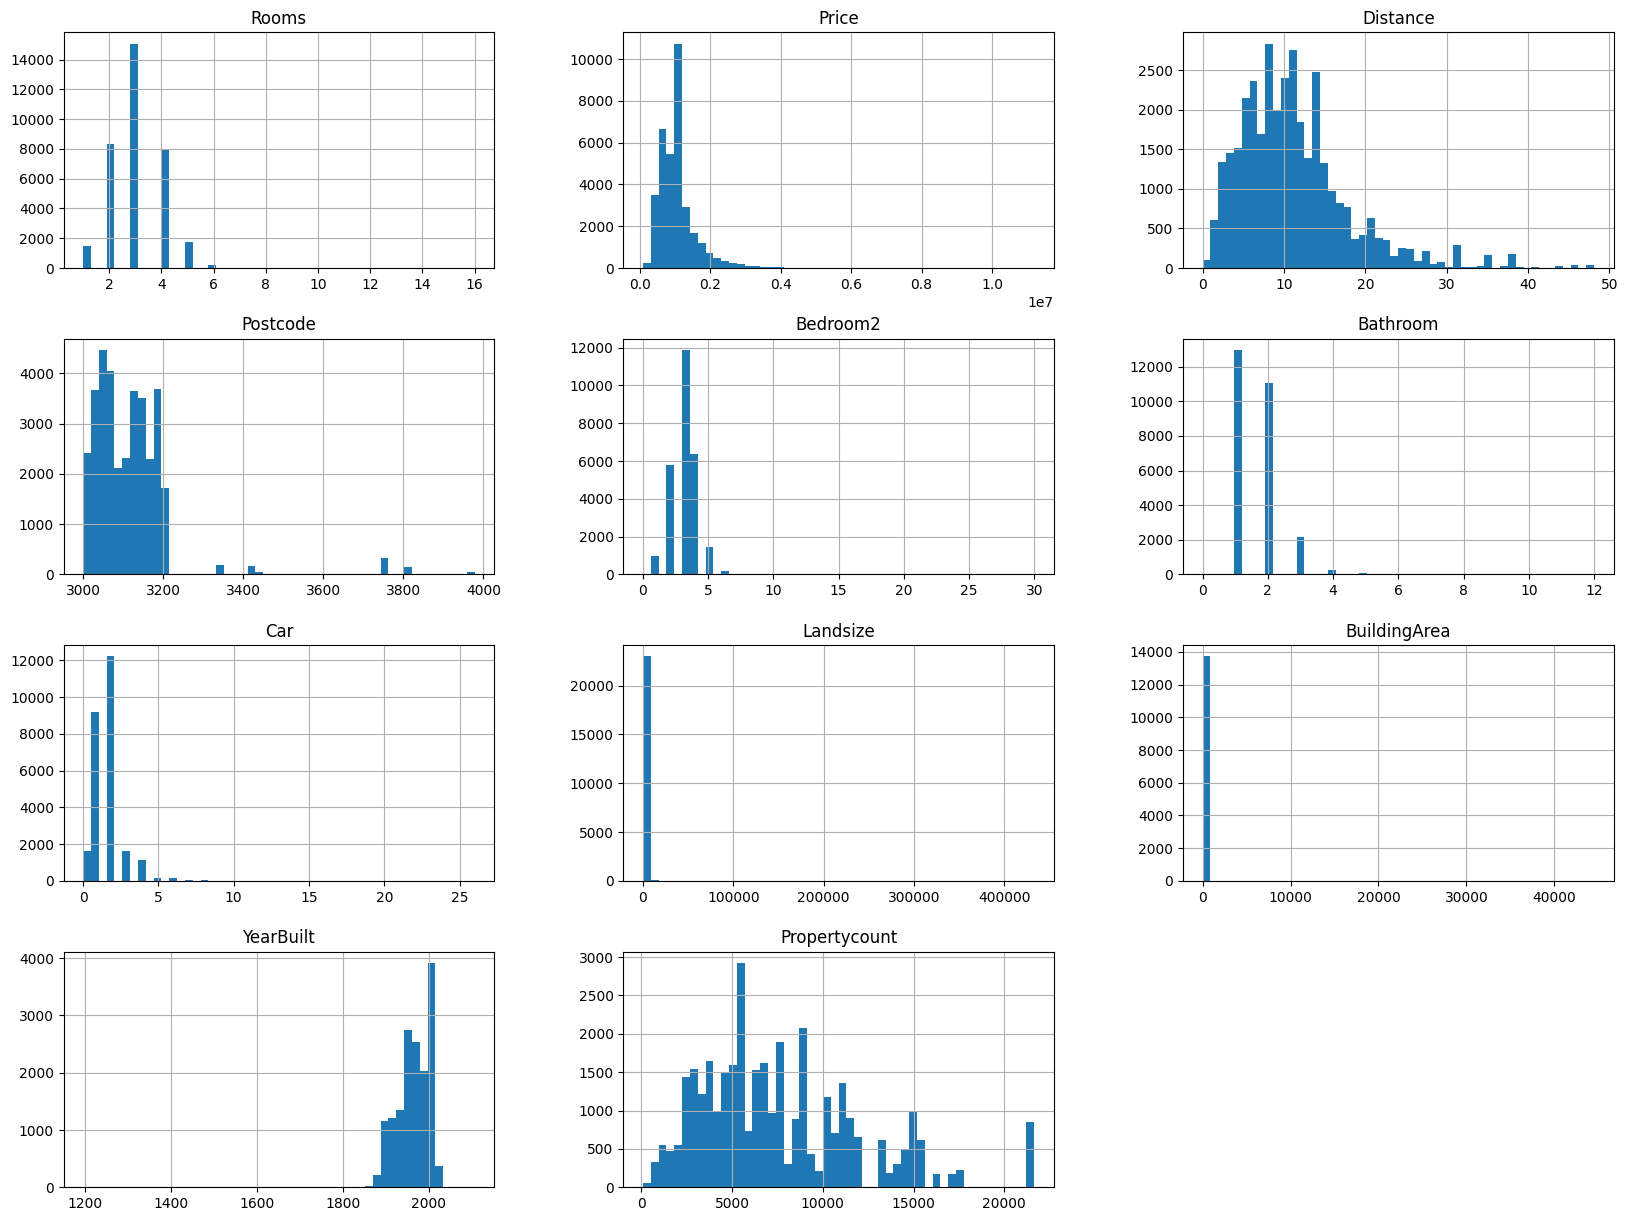

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.savefig('hist_data.png')

<Axes: xlabel='Rooms'>

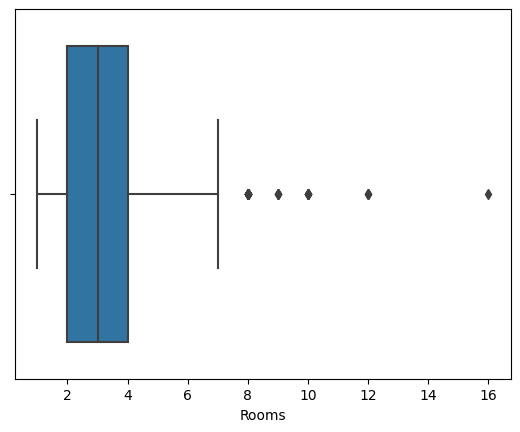

In [ ]:
sns.boxplot(data=df, x='Rooms')

<Axes: xlabel='Price'>

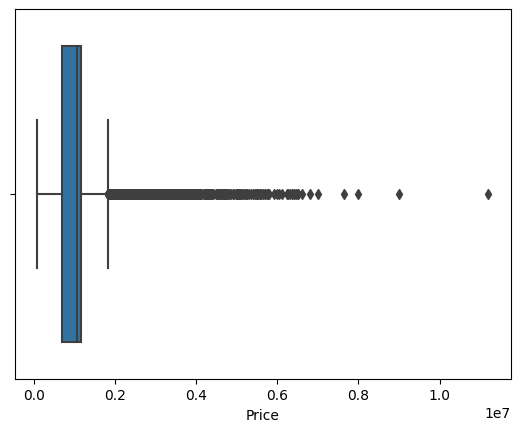

In [ ]:
sns.boxplot(data=df, x='Price')

<Axes: xlabel='Distance'>

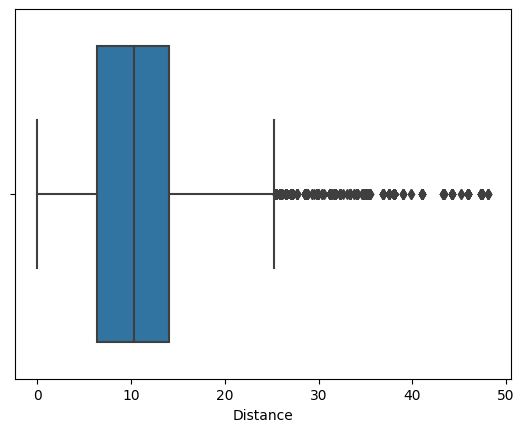

In [ ]:
sns.boxplot(data=df, x='Distance')

<Axes: xlabel='Bedroom2'>

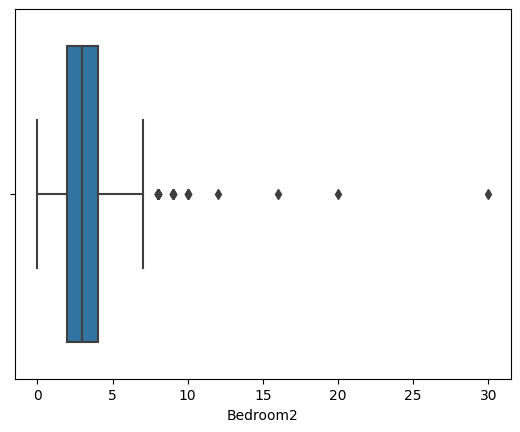

In [ ]:
sns.boxplot(data=df, x='Bedroom2')

<Axes: xlabel='Bathroom'>

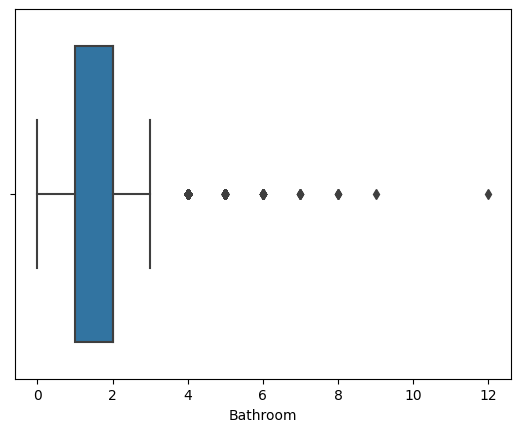

In [ ]:
sns.boxplot(data=df, x='Bathroom')

In [ ]:
df.Bathroom[df['Bathroom']==0].count()

46

In [ ]:
df.Bathroom.replace(0,1, inplace=True)

<Axes: xlabel='Car'>

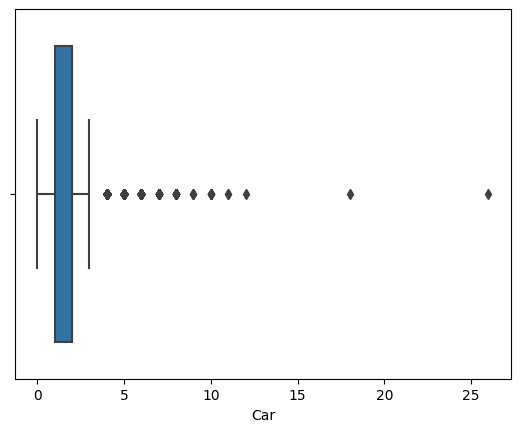

In [ ]:
sns.boxplot(data=df, x='Car')

<Axes: xlabel='Landsize'>

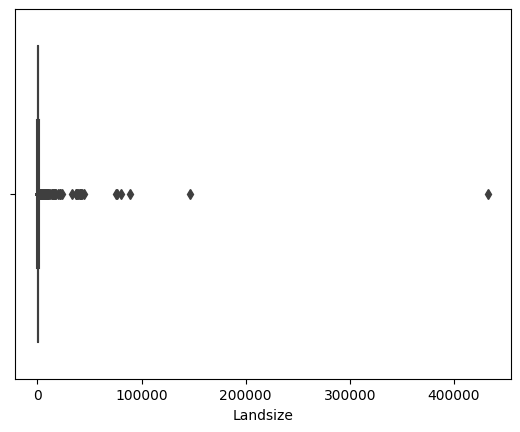

In [ ]:
sns.boxplot(data=df, x='Landsize')

In [ ]:
df.BuildingArea[df['Landsize']==0].count()

1327

<Axes: xlabel='BuildingArea'>

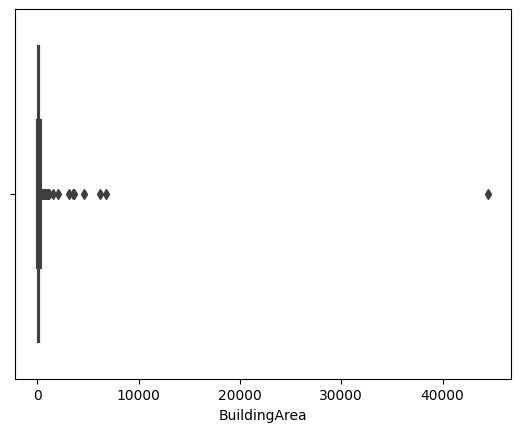

In [ ]:
sns.boxplot(data=df, x='BuildingArea')

In [ ]:
df.BuildingArea[df['BuildingArea']==0].count()

76

<Axes: xlabel='YearBuilt'>

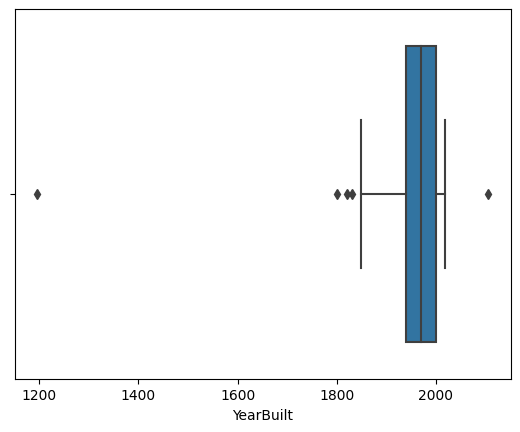

In [ ]:
sns.boxplot(data=df, x='YearBuilt')

<Axes: xlabel='Propertycount'>

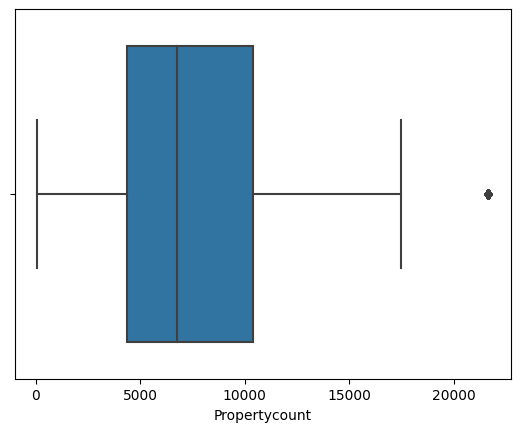

In [ ]:
sns.boxplot(data=df, x='Propertycount')

In [ ]:
df.groupby('Rooms').mean()['Price']

<ipython-input-29-a4476e0cdef6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Rooms').mean()['Price']


Rooms
1     5.510034e+05
2     8.133868e+05
3     1.033020e+06
4     1.287774e+06
5     1.585202e+06
6     1.609214e+06
7     1.513612e+06
8     1.541415e+06
9     1.132630e+06
10    1.856696e+06
12    2.153391e+06
16    5.000000e+06
Name: Price, dtype: float64

In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
Rooms,1.000000,0.404911,0.271511,0.085890,0.946755,0.612879,0.393878,0.037402,0.156229,-0.012749,-0.071677
Price,0.404911,1.000000,-0.186849,0.040512,0.368067,0.365812,0.174743,0.031958,0.098883,-0.288049,-0.052935
Distance,0.271511,-0.186849,1.000000,0.481566,0.269524,0.125337,0.241835,0.060862,0.076301,0.323059,-0.018140
Postcode,0.085890,0.040512,0.481566,1.000000,0.089292,0.120385,0.067886,0.040664,0.042437,0.089805,0.017108
Bedroom2,0.946755,0.368067,0.269524,0.089292,1.000000,0.614961,0.388491,0.037019,0.154157,-0.002022,-0.053451
Bathroom,0.612879,0.365812,0.125337,0.120385,0.614961,1.000000,0.304577,0.036220,0.147558,0.167965,-0.032997
Car,0.393878,0.174743,0.241835,0.067886,0.388491,0.304577,1.000000,0.037829,0.104373,0.128702,-0.009617
Landsize,0.037402,0.031958,0.060862,0.040664,0.037019,0.036220,0.037829,1.000000,0.354530,0.044474,-0.018195
BuildingArea,0.156229,0.098883,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,-0.024523
YearBuilt,-0.012749,-0.288049,0.323059,0.089805,-0.002022,0.167965,0.128702,0.044474,0.067811,1.000000,0.022420


In [ ]:
df2=df[['BuildingArea', 'Landsize', 'YearBuilt']]
df2

,BuildingArea,Landsize,YearBuilt
0,NaN,126.0,NaN
1,NaN,202.0,NaN
2,79.0,156.0,1900.0
3,NaN,0.0,NaN
4,150.0,134.0,1900.0
...,...,...,...
34852,NaN,593.0,NaN
34853,104.0,98.0,2018.0
34854,120.0,220.0,2000.0
34855,NaN,NaN,NaN


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.CouncilArea.unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council', nan],
      dtype=object)

In [ ]:
df.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

In [ ]:
df.Suburb.unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [ ]:
df.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [ ]:
df.Method.unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [ ]:
df['YearBuilt']=2023-df['YearBuilt']

In [ ]:
df=df.fillna(0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1.050173e+06,SS,Jellis,2.5,3067.0,2.0,1.0,1.0,126.0,0.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1.480000e+06,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1.035000e+06,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,123.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,1.050173e+06,VB,Rounds,2.5,3067.0,3.0,2.0,1.0,0.0,0.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1.465000e+06,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,123.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1.480000e+06,PI,Jas,6.3,3013.0,4.0,1.0,3.0,593.0,0.0,0.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,2,h,8.880000e+05,SP,Sweeney,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,5.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,7.050000e+05,S,Jas,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,23.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,3,h,1.140000e+06,SP,hockingstuart,6.3,3013.0,0.0,0.0,0.0,0.0,0.0,0.0,Maribyrnong City Council,Western Metropolitan,6543.0


In [ ]:
df=df.drop(['CouncilArea','Suburb','SellerG'],axis=1)

In [ ]:
df

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,2,h,1.050173e+06,SS,2.5,3067.0,2.0,1.0,1.0,126.0,0.0,0.0,Northern Metropolitan,4019.0
1,2,h,1.480000e+06,S,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,0.0,Northern Metropolitan,4019.0
2,2,h,1.035000e+06,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,123.0,Northern Metropolitan,4019.0
3,3,u,1.050173e+06,VB,2.5,3067.0,3.0,2.0,1.0,0.0,0.0,0.0,Northern Metropolitan,4019.0
4,3,h,1.465000e+06,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,123.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1.480000e+06,PI,6.3,3013.0,4.0,1.0,3.0,593.0,0.0,0.0,Western Metropolitan,6543.0
34853,2,h,8.880000e+05,SP,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,5.0,Western Metropolitan,6543.0
34854,2,t,7.050000e+05,S,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,23.0,Western Metropolitan,6543.0
34855,3,h,1.140000e+06,SP,6.3,3013.0,0.0,0.0,0.0,0.0,0.0,0.0,Western Metropolitan,6543.0


In [ ]:
columns_onehot=['Type','Method','Regionname']

In [ ]:
df=pd.get_dummies(df,columns=columns_onehot)

In [ ]:
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Method_W,Regionname_0,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1.050173e+06,2.5,3067.0,2.0,1.0,1.0,126.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,2,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,2,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,123.0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.050173e+06,2.5,3067.0,3.0,2.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,3,1.465000e+06,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,123.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1.480000e+06,6.3,3013.0,4.0,1.0,3.0,593.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
34853,2,8.880000e+05,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,5.0,...,0,0,0,0,0,0,0,0,1,0
34854,2,7.050000e+05,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,23.0,...,0,0,0,0,0,0,0,0,1,0
34855,3,1.140000e+06,6.3,3013.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
